In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import quantum as qm
import glob
import scipy.linalg as la
import seaborn as sns

In [2]:
colors = ["aqua", "red"]
sns.set_palette(sns.xkcd_palette(colors)+sns.color_palette("Set1", 9))

In [3]:
# Setup #
L = 15
dense = True
h = .35
prefix = 'data/zotoc_vbL' + str(L)
if (h != 1): prefix += 'h'+str(h)
prefix += "#"
sites = np.arange(L)
vs    = np.asarray([.3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.35, 1.5])
fnames = glob.glob(prefix + "*.npy")

In [4]:
trials = len(fnames)
otocsfores = np.zeros((trials, len(vs), L))
otocsbacks = np.zeros((trials, len(vs), L))
for idx, fname in enumerate(fnames):
    otocsfores[idx], otocsbacks[idx] = np.load(fname)

/Users/cstahl/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:1478: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


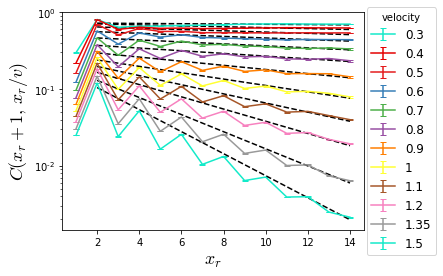

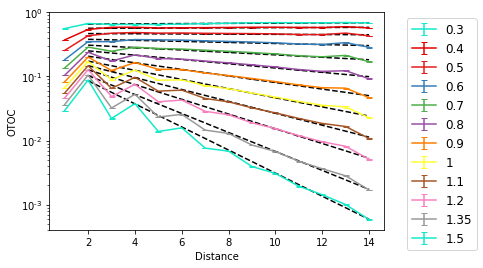

In [22]:
otocsfore, stdsfore = qm.mean_and_std(otocsfores)
otocsback, stdsback = qm.mean_and_std(otocsbacks)
# otocsfore = otocsfores[0]
# otocsback = otocsbacks[0]

# Forward
ax = plt.subplot(111)
gammas_fore = []
errors_fore = []
for idx, otocfore in enumerate(otocsfore):
#     mean, std = qm.mean_and_std(otocfore[::])
    ax.set_yscale("log", nonposy='clip')
#     ax.errorbar(sites[1:], otocfore[1:], label = str(vs[idx]))
    ax.errorbar(sites[1:], otocfore[1:], yerr=stdsfore[idx,1:], label = str(qm.chop(vs[idx])))
    x = sites[2::2]
    y = otocfore[2::2]
    logy = np.log(y)
    coeffs, errors = np.polyfit(x,logy,deg=1, cov=True)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_fore.append(coeffs[0] * vs[idx])
    errors_fore.append(np.sqrt(errors[0,0]) * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(0.99, 1.05), loc=2, title="velocity")
plt.ylim(0,1)
plt.xlabel("$x_r$", fontsize=18)
plt.ylabel("$C(x_r+1,\, x_r/v)$", fontsize=18)
# plt.title("Right-going OTOCs")
plt.savefig('figures/oddVDLEfromOTOCs.pdf')
plt.show()

# Backward
ax = plt.subplot(111)
gammas_back = []
errors_back = []
for idx, otocback in enumerate(otocsback):
    ax.set_yscale("log", nonposy='clip')
#     ax.errorbar(sites[1:], otocback[1:], label = str(vs[idx]))
    ax.errorbar(sites[1:], otocback[1:], yerr=stdsback[idx,1:], label = str(qm.chop(vs[idx])))
    x = sites[2::2]
    y = otocback[2::2]
    logy = np.log(y)
    coeffs, errors = np.polyfit(x,logy,deg=1, cov=True)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_back.append(coeffs[0] * vs[idx])
    errors_back.append(np.sqrt(errors[0,0]) * vs[idx])
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.99, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.xlabel("Distance")
plt.ylabel("OTOC")
# plt.title("Backward OTOCs")
# plt.savefig('figures/zotocs_backL' + str(L) + '.pdf')
plt.show()

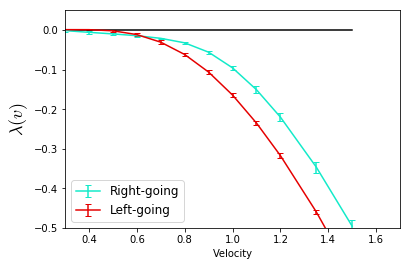

In [9]:
ax = plt.subplot(111)
ax.errorbar(vs, gammas_fore, yerr=errors_fore,  label = "Right-going")
ax.errorbar(vs, gammas_back, yerr=errors_back,  label = "Left-going")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc=3)
# plt.title("Odd Sites")
plt.xlabel("Velocity")
plt.xlim((0.3,1.7))
plt.ylim((-.5,.05))
plt.ylabel("$\lambda(v)$", fontsize=18)
# plt.savefig('figures/oddVDLE.pdf')
plt.show()

### Get error from disorder

In [10]:
# Forward
gammas_fores = np.zeros(np.shape(otocsfores)[:-1])
for trial, otocsfore in enumerate(otocsfores):
    for idx, otocfore in enumerate(otocsfore):
        x = sites[3::2]
        y = otocfore[3::2]
        logy = np.log(y)
        coeffs, errors = np.polyfit(x,logy,deg=1, cov=True)
    #     print(vs[idx], coeffs)
        gammas_fores[trial, idx] = coeffs[0] * vs[idx]

# Backward
gammas_backs = np.zeros(np.shape(otocsbacks)[:-1])
for trial, otocsback in enumerate(otocsbacks):
    for idx, otocback in enumerate(otocsback):
        x = sites[3::2]
        y = otocback[3::2]
        logy = np.log(y)
        coeffs, errors = np.polyfit(x,logy,deg=1, cov=True)
        gammas_backs[trial, idx] = coeffs[0] * vs[idx]

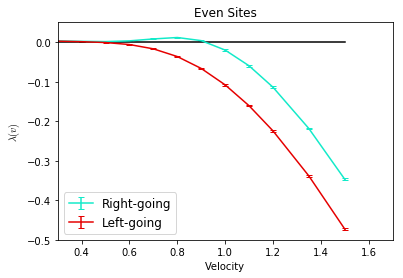

In [17]:
gammas_fore, errors_fore = qm.mean_and_std(gammas_fores)
gammas_back, errors_back = qm.mean_and_std(gammas_backs)

ax = plt.subplot(111)
ax.errorbar(vs, gammas_fore, yerr=errors_fore,  label = "Right-going")
ax.errorbar(vs, gammas_back, yerr=errors_back,  label = "Left-going")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc=3)
plt.title("Even Sites")
plt.xlabel("Velocity")
plt.xlim((0.3,1.7))
plt.ylim((-.5,.05))
plt.ylabel("$\lambda(v)$")
# plt.savefig('figures/zbutterfly_even_L' + str(L) + 'h' + str(h) + '.pdf')
plt.show()

In [4]:
len(fnames)

100